# plot_events_per_year.ipynb

#### Robert Peal November 2024

- Plot the number of westerly events detected at each grid point per year
- Plot is divided into seasons

- Data should be generated by `calculate_season_average.py'

In [1]:
import xarray as xr
import sys
sys.path.append("/home/atuin/c104fa/c104fa10/utils")
import tctools2 as tct
import numpy as np
import matplotlib.pyplot as plt
import pyproj
pyproj.datadir.set_data_dir("/home/atuin/c104fa/c104fa10/software/conda/envs/atmos_sci/share/proj") ## This line is needed to allow geopandas imports
import cartopy.crs as ccrs

/home/atuin/c104fa/c104fa10/software/conda/envs/atmos_sci/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


#### User options

In [2]:
# Path to load the seasonal averages
dataLoc = f"/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/eventsPerYear/seasonAvgs.1980.2022.nc"

# Where to save figure
figSaveLoc = f"/home/atuin/c104fa/c104fa10/eeaWesterliesPaper/eventsPerYear/wmtePerYear.1980.2022"

# Seasons
seasons = [[1,2],[3,4,5],[6,7,8,9],[10,11,12]]
seasonLabels = ["JF","MAM","JJAS","OND"]

#### Load data

In [3]:
seasonAvgs = xr.open_dataset(dataLoc).compute()

#### Generate plot

Plotting season JF
Plotting season MAM
Plotting season JJAS
Plotting season OND
Saving to /home/atuin/c104fa/c104fa10/eeaWesterliesPaper/eventsPerYear/wmtePerYear.1980.2022


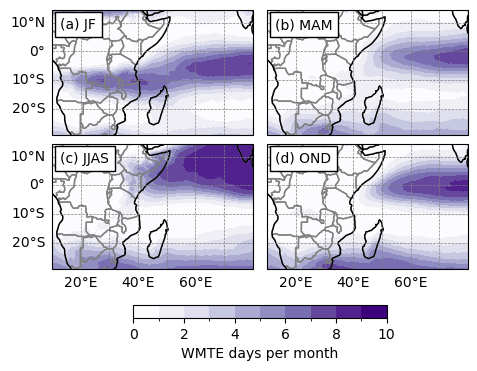

In [20]:
# Plot options

letters = ["a","b","c","d"]

figsize = (12.,9.1) # fig size in cm
dpi = 300 # For saving
levels=  np.arange(11) # cmap levels
cmap = plt.get_cmap("Purples") # cmap

# Plot area
extent = [10,80,12,-25]
# tick locs
yticks = np.arange(-30,20,10)
xticks = np.arange(10,80,10)

cmPerInch = 2.54

# Draw the plot
fig,axs = tct.new_map_axes(nrows=2,ncols=2,figsize=(figsize[0] / cmPerInch, figsize[1] / cmPerInch) ,gridlines=False)

for seasonix , season in enumerate(seasons):
    # Data selection
    label = seasonLabels[seasonix]
    print(f"Plotting season {label}")
    data = seasonAvgs[label]
    ax = axs.ravel()[seasonix]
    
    # Plot the data
    im=data.plot.contourf(ax=ax,add_colorbar=False,levels=levels,cmap=cmap)
    
    # Decorating
    ax.set_title(None)
    ax.text(0.04,0.88,f"({letters[seasonix]}) {label}",transform=ax.transAxes,ha="left",va="center",bbox=dict(facecolor='white', edgecolor='black'))#, boxstyle='round,pad=1'))
    ax.set_extent(extent)

    # Add gridlines with labels only on the outer subplots
    gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), color='gray', linestyle='--', linewidth=0.5)
    i=seasonix
    # Configure which gridline labels appear based on subplot position
    if i in [1, 3]:  # Right column turn off left labels
        gl.left_labels = False
    if i in [0, 1]:  # Top row turn off bottom labels
        gl.bottom_labels = False
    if i in [0,1, 2,3]:  # Turn off all top and right labels
        gl.right_labels = False
        gl.top_labels = False
        

    # Additional adjustments (optional, for finer control)
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}

fig.colorbar(im,label="WMTE days per month",ax=axs,shrink=0.6,orientation="horizontal")

# Add abcd labels
# tct.add_labels(axs,0.03,0.85,fontweight="bold")

print(f"Saving to {figSaveLoc}")
plt.savefig(f"{figSaveLoc}.pdf",dpi=dpi,bbox_inches='tight')
plt.savefig(f"{figSaveLoc}.tif",dpi=dpi,bbox_inches='tight')

Plotting season JF
Plotting season MAM
Plotting season JJAS
Plotting season OND


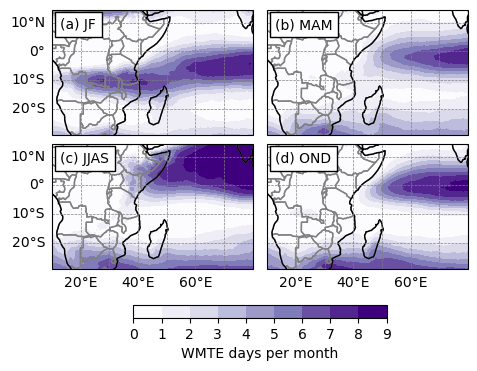

In [14]:
# Plot options

letters = ["a","b","c","d"]

figsize = (12.,9.1) # fig size in cm
dpi = 300 # For saving
levels=  np.arange(0,10,1.) # cmap levels
levelsFrac = np.arange(0,1.2,0.2)
cmap = plt.get_cmap("Purples") # cmap

# Plot area
extent = [10,80,12,-25]
# tick locs
yticks = np.arange(-30,20,10)
xticks = np.arange(10,80,10)

cmPerInch = 2.54

# Draw the plot
fig,axs = tct.new_map_axes(nrows=2,ncols=2,figsize=(figsize[0] / cmPerInch, figsize[1] / cmPerInch) ,gridlines=False)

for seasonix , season in enumerate(seasons):
    # Data selection
    label = seasonLabels[seasonix]
    print(f"Plotting season {label}")
    data = seasonAvgs[label]
    ax = axs.ravel()[seasonix]
    
    # Plot the data
    im=data.plot.contourf(ax=ax,add_colorbar=False,levels=levels,cmap=cmap)

    # (data / (len(season)*30)).plot.contourf(ax=ax,add_colorbar=False,levels=levelsFrac,colors=None,hatches=".")
    
    # Decorating
    ax.set_title(None)
    ax.text(0.04,0.88,f"({letters[seasonix]}) {label}",transform=ax.transAxes,ha="left",va="center",bbox=dict(facecolor='white', edgecolor='black'))#, boxstyle='round,pad=1'))
    ax.set_extent(extent)

    # Add gridlines with labels only on the outer subplots
    gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), color='gray', linestyle='--', linewidth=0.5)
    i=seasonix
    # Configure which gridline labels appear based on subplot position
    if i in [1, 3]:  # Right column turn off left labels
        gl.left_labels = False
    if i in [0, 1]:  # Top row turn off bottom labels
        gl.bottom_labels = False
    if i in [0,1, 2,3]:  # Turn off all top and right labels
        gl.right_labels = False
        gl.top_labels = False
        

    # Additional adjustments (optional, for finer control)
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}

fig.colorbar(im,label="WMTE days per month",ax=axs,shrink=0.6,orientation="horizontal")

# Add abcd labels
# tct.add_labels(axs,0.03,0.85,fontweight="bold")

# print(f"Saving to {figSaveLoc}")
# plt.savefig(f"{figSaveLoc}.pdf",dpi=dpi,bbox_inches='tight')
# plt.savefig(f"{figSaveLoc}.tif",dpi=dpi,bbox_inches='tight')

In [41]:
seasonAvgs

<xarray.Dataset>
Dimensions:    (longitude: 497, latitude: 309)
Coordinates:
  * longitude  (longitude) float32 -22.0 -21.75 -21.5 ... 101.5 101.8 102.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -36.5 -36.75 -37.0
    level      int32 700
    quantile   float64 0.7
Data variables:
    JF         (latitude, longitude) float64 1.5 1.5 1.5 1.5 ... 3.5 3.0 3.0 3.0
    MAM        (latitude, longitude) float64 3.667 3.667 4.333 ... 5.0 4.667
    JJAS       (latitude, longitude) float64 0.25 0.25 0.25 0.25 ... 5.5 5.5 5.5
    OND        (latitude, longitude) float64 2.667 2.667 2.667 ... 5.667 5.667